In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score, mean_squared_error as mse, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

# plotting stuff
from matplotlib import pyplot as plt
import seaborn as sns
# Set seed for reproducibility
np.random.seed(42)

In [2]:
'''This is the features dataframe for all teams in 2018-2019 season, 
also the features we want to train on.'''
df18 = pd.read_csv("team18.csv", index_col=0)
df19 = pd.read_csv("team19.csv", index_col=0)
df20 = pd.read_csv("team20.csv", index_col=0)
df18.head()

,TEAM,PACE,AST,TO,REBR,OFF EFF,DEF EFF,Number of all stars,TEAM_ID,CITY,year
0,GSW,103.2,20.7,12.6,51.0,113.9,106.5,3.001,1610612744,Golden State,2018-2019
1,HOU,100.4,16.0,12.0,48.1,112.5,107.9,1.001,1610612745,Houston,2018-2019
2,MIL,105.4,18.4,12.0,52.3,111.5,103.0,2.001,1610612749,Milwaukee,2018-2019
3,POR,101.6,16.7,12.1,52.8,111.4,108.1,1.001,1610612757,Portland,2018-2019
4,SAS,100.4,18.3,11.0,50.5,111.1,108.3,1.001,1610612759,San Antonio,2018-2019


In [3]:
'''This is the results dataframe for all games in 18-19 season, 
also the variable we want to predict.'''
df_18 = pd.read_csv("game_results_18.csv")
df_19 = pd.read_csv("game_results_19.csv")
df_20 = pd.read_csv("game_results_20.csv")
df_18

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,HOME_TEAM_WINS
0,2019-06-13,41800406,1610612744,1610612761,2018,0
1,2019-06-10,41800405,1610612761,1610612744,2018,0
2,2019-06-07,41800404,1610612744,1610612761,2018,0
3,2019-06-05,41800403,1610612744,1610612761,2018,0
4,2019-06-02,41800402,1610612761,1610612744,2018,0
...,...,...,...,...,...,...
1373,2018-09-30,11800009,1610612741,1610612740,2018,1
1374,2018-09-30,11800010,1610612747,1610612743,2018,0
1375,2018-09-29,11800003,1610612761,1610612757,2018,1
1376,2018-09-29,11800005,1610612744,1610612750,2018,0


In [4]:
def ratio(id_home, id_away, df):
    '''Given the team id of two teams, return the ratio of their 6 features.'''
    home = df.loc[df['TEAM_ID'] == id_home] #get 6 parameters of home team
    visitor = df.loc[df['TEAM_ID'] == id_away]
    stats = [] #list of 6 parameter ratio for the 2 teams
    for i in range(6):
        xi = home.iloc[0, i+1] / visitor.iloc[0, i+1]
        stats.append(xi)
    return stats

y18 = np.array(df_18.HOME_TEAM_WINS)

# for every game, store the 7 ratios of home team / away team in X_train
X18 = []
for i in range(len(y18)):
    id1 = df_18.iloc[i,2] # home id
    id2 = df_18.iloc[i,3] # visitor id
    X18.append(ratio(id1, id2, df18))


X18 = np.array(X18)
X18.shape, y18.shape



((1378, 6), (1378,))

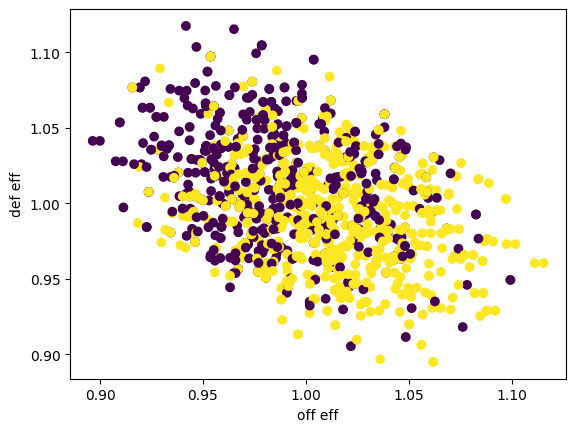

In [5]:
'''plot defensive eficiency against offensive efficiency'''
X_eff = np.array(X18)[:, 4:6]
plt.clf()
plt.scatter(X_eff[:, 0],X_eff[:, 1], c = y18)
plt.xlabel('off eff')
plt.ylabel('def eff')
plt.show()

### Apply decision tree on 2018-2019 season data

The interesting reader can replace X18 and y18 with data of 2019 or 2020.

In [6]:
'''build tree on 2018 data'''
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X18, y18, test_size = 0.3)
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, Y_train)

Y_pred_train=DT.predict(X_train)
print("training accuracy is", accuracy_score(Y_pred_train, Y_train))

Y_pred_test = DT.predict(X_test) #predicted labels on testing data
print("testing accuracy is", accuracy_score(Y_pred_test, Y_test))

training accuracy is 0.8993775933609959
testing accuracy is 0.5917874396135265


To prevent overfitting, try with less parameters in x.

We tried taking away various x parameters, and we found out only taking "number of all stars" away will increase accuracy (sometimes,not always)

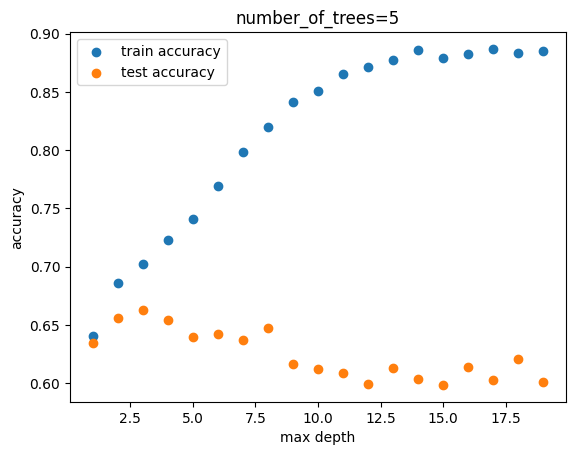

test accuracy is [0.634817573402418, 0.6555807426597582, 0.6628562176165802, 0.6545876511226253, 0.6400906735751295, 0.6421578151986183, 0.6369386873920553, 0.6473067789291882, 0.6161917098445595, 0.6120304404145077, 0.6089270293609672, 0.5995466321243523, 0.6131044905008636, 0.603751079447323, 0.5985373488773748, 0.6141083765112263, 0.6026932210708117, 0.620363773747841, 0.6006422711571675]


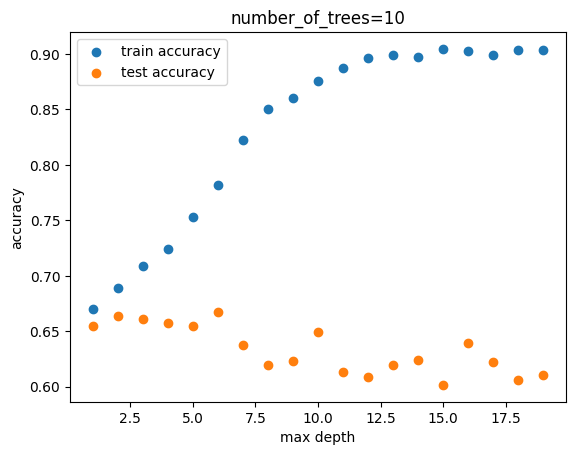

test accuracy is [0.6545444732297063, 0.6639302677029362, 0.6607836787564766, 0.6576640759930916, 0.6545552677029361, 0.6669743091537133, 0.6379587651122626, 0.619262737478411, 0.6234455958549223, 0.6493415371329879, 0.6130721070811745, 0.6089054404145078, 0.6192735319516408, 0.6244926597582038, 0.6016353626943005, 0.6390004317789291, 0.6223715457685665, 0.6058290155440413, 0.610994170984456]


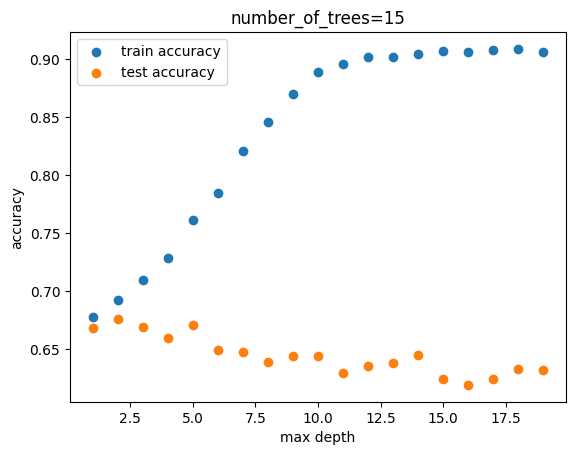

test accuracy is [0.6680969343696026, 0.6763439119170984, 0.6690846286701209, 0.6596988341968911, 0.6711841537132989, 0.6493901122625216, 0.6473013816925735, 0.6389572538860103, 0.644192573402418, 0.6441601899827288, 0.6296794041450777, 0.63584304835924, 0.6379749568221071, 0.6452288428324698, 0.624449481865285, 0.6193167098445597, 0.6245034542314335, 0.6327396373056995, 0.6317573402417962]


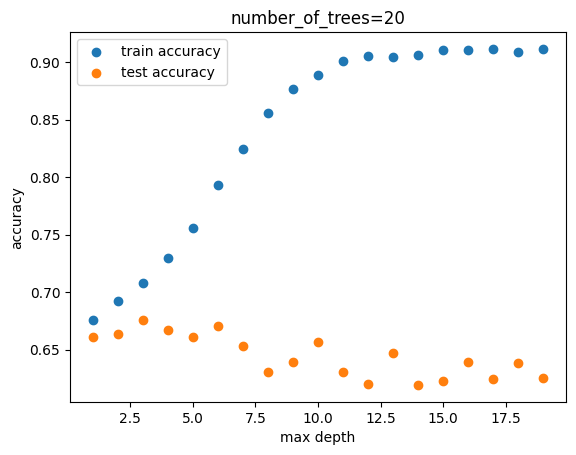

test accuracy is [0.6607836787564767, 0.663860103626943, 0.6753076424870467, 0.6670444732297064, 0.6608106649395509, 0.6701047063903282, 0.6535243955094991, 0.6306455094991364, 0.63896804835924, 0.6566278065630398, 0.630699481865285, 0.6203367875647668, 0.6473445595854923, 0.6192573402417962, 0.6223715457685665, 0.6389950345423144, 0.6244656735751295, 0.6379587651122626, 0.6255343264248705]


In [13]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X18, y18, test_size = 0.3)
number_of_trees=[5,10,15,20]
max_depth= np.arange(1, 20)
train_accuracy = []
test_accuracy = []

kf = KFold(n_splits=5, shuffle=True) # use 5-fold cross validation within X_train
for i in number_of_trees:
    for j in max_depth:
        train_acc_sum = 0
        test_acc_sum = 0
        for train_index, test_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
            Y_train_fold, Y_val_fold = Y_train[train_index], Y_train[test_index]
            RFclf = RandomForestClassifier(n_estimators=i, max_depth=j, max_features='sqrt')
            RFclf.fit(X_train_fold, Y_train_fold)

            Y_pred_train = RFclf.predict(X_train_fold)
            Y_pred_test = RFclf.predict(X_val_fold)

            train_acc_sum += accuracy_score(Y_train_fold, Y_pred_train)
            test_acc_sum += accuracy_score(Y_val_fold, Y_pred_test)
    
        train_accuracy.append(train_acc_sum / 5)  # average over 5 folds
        test_accuracy.append(test_acc_sum / 5)  # average over 5 folds

    plt.title(f"number_of_trees={i}")
    plt.xlabel("max depth")
    plt.ylabel("accuracy")
    plt.scatter(max_depth,train_accuracy,label="train accuracy")
    plt.scatter(max_depth,test_accuracy,label="test accuracy")
    plt.legend()
    plt.show()
    print("test accuracy is",test_accuracy)
    train_accuracy.clear()
    test_accuracy.clear()

We achieved highest test accuracy of 67.6% with 15 trees and max depth = 2, and a close (slightly higher) training accuracy.

We will use this hyperparameter choice to evaluate on the separate X_test set.

In [15]:
#redefine optimal random forest classifyer on whole dataset
RFclf = RandomForestClassifier(n_estimators=15, max_depth = 2, max_features='sqrt') 
RFclf.fit(X_train, Y_train)
Y_pred = RFclf.predict(X_test)
print("test accuracy is", accuracy_score(Y_pred, Y_test))

test accuracy is 0.6835748792270532


### Visualize relative importance of each feature in a bar chart


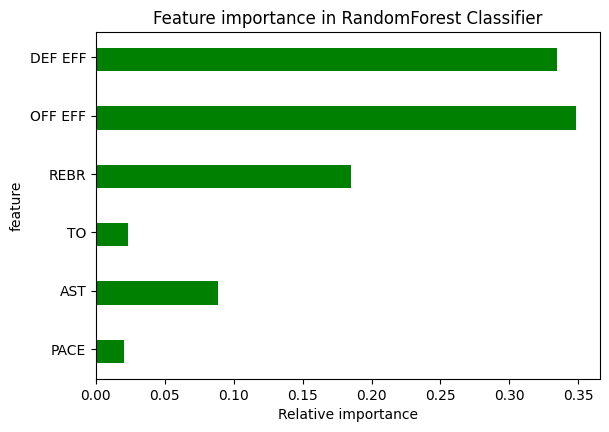

<Figure size 500x500 with 0 Axes>

In [16]:
col = ['PACE','AST','TO','REBR','OFF EFF','DEF EFF']
y = RFclf.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)